In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


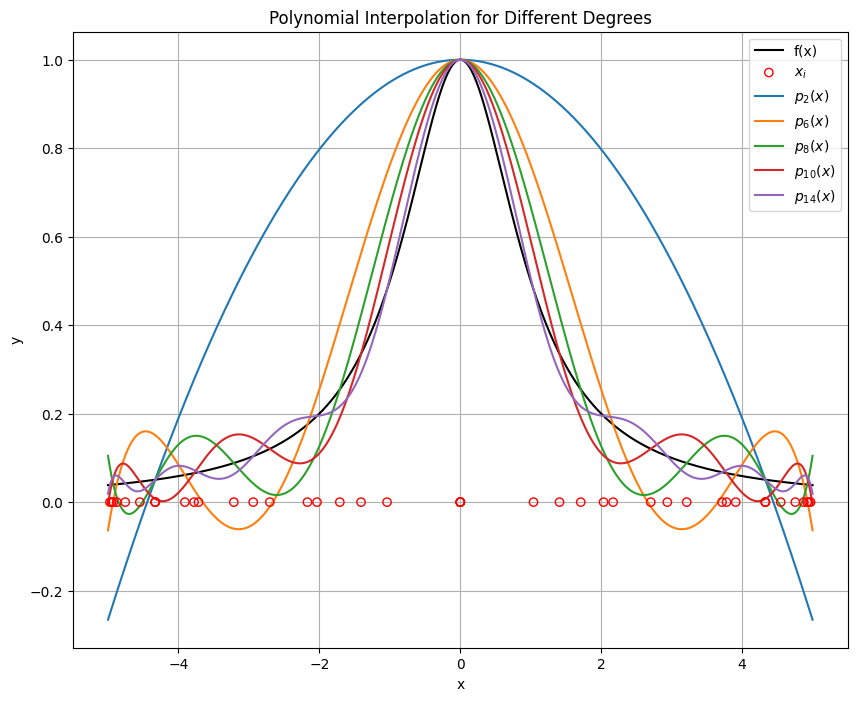

In [2]:
def f(x):
    return 1 / (1 + x**2)
def vandermonde_matrix(x_values, n=None):
    n = n or len(x_values)
    A = np.zeros((len(x_values), n))
    for i in range(n):
        A[:, i] = x_values ** i
    return A
def polynomial_interpolation_with_inverse(x_points, y_points):
    A = vandermonde_matrix(x_points)
    A_inv = np.linalg.inv(A)
    c = np.dot(A_inv, y_points)
    return c
def evaluate_polynomial(x_values, coefficients):
    A_tilda = vandermonde_matrix(x_values, len(coefficients))
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda
x_range = np.linspace(-5, 5, 1000)
n_values = [2, 6, 8, 10, 14]

plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')

for i, n in enumerate(n_values):
    # Compute the Chebyshev nodes for the interval [-1, 1]
    k = np.arange(n + 1)
    chebyshev_nodes = np.cos(np.pi * (2 * k + 1) / (2 * n + 2))
    
    # Map the Chebyshev nodes from [-1, 1] to [-5, 5] using a linear transformation
    a = -5
    b = 5
    x_points = 0.5 * (b - a) * chebyshev_nodes + 0.5 * (a + b)
    y_points = f(x_points)
    c = polynomial_interpolation_with_inverse(x_points, y_points)
    y_tilda = evaluate_polynomial(x_range, c)
    if i == 0:
        plt.scatter(x_points, np.zeros(len(y_points)), edgecolor='r', facecolor='none', zorder=5, label='$x_i$')
    else:
        plt.scatter(x_points, np.zeros(len(y_points)), edgecolor='r', facecolor='none', zorder=5)
    plt.plot(x_range, y_tilda, label=rf'$p_{{{n}}}(x)$')   
plt.legend()
plt.title('Polynomial Interpolation for Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

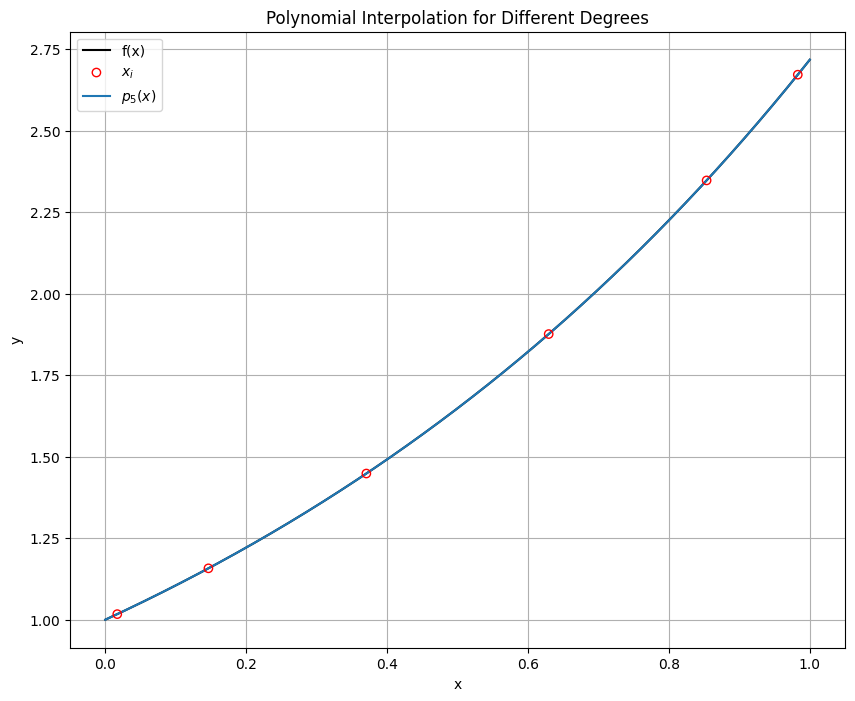

In [3]:
def f(x):
    return np.exp(x)
def vandermonde_matrix(x_values, n=None):
    n = n or len(x_values)
    A = np.zeros((len(x_values), n))
    for i in range(n):
        A[:, i] = x_values ** i
    return A
def polynomial_interpolation_with_inverse(x_points, y_points):
    A = vandermonde_matrix(x_points)
    A_inv = np.linalg.inv(A)
    c = np.dot(A_inv, y_points)
    return c
def evaluate_polynomial(x_values, coefficients):
    A_tilda = vandermonde_matrix(x_values, len(coefficients))
    y_tilda = np.dot(A_tilda, coefficients)
    return y_tilda
x_range = np.linspace(0, 1, 1000)
n_values = [5]

plt.figure(figsize=(10, 8))
plt.plot(x_range, f(x_range), label='f(x)', color='black')

for i, n in enumerate(n_values):
    # Compute the Chebyshev nodes for the interval [-1, 1]
    k = np.arange(n + 1)
    chebyshev_nodes = np.cos(np.pi * (2 * k + 1) / (2 * n + 2))
    
    # Map the Chebyshev nodes from [-1, 1] to [-5, 5] using a linear transformation
    a = 0
    b = 1
    x_points = 0.5 * (b - a) * chebyshev_nodes + 0.5 * (a + b)
    y_points = f(x_points)
    c = polynomial_interpolation_with_inverse(x_points, y_points)
    y_tilda = evaluate_polynomial(x_range, c)
    if i == 0:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5, label='$x_i$')
    else:
        plt.scatter(x_points, y_points, edgecolor='r', facecolor='none', zorder=5)
    plt.plot(x_range, y_tilda, label=rf'$p_{{{n}}}(x)$')   
plt.legend()
plt.title('Polynomial Interpolation for Different Degrees')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [8]:
def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)  # Derivative of e^x is e^x

def integral_f(x):
    return np.exp(x) - 1 

n = 5

# Compute the Chebyshev nodes for the interval [-1, 1]
k = np.arange(n + 1)
chebyshev_nodes = np.cos(np.pi * (2 * k + 1) / (2 * n + 2))
    
# Map the Chebyshev nodes from [-1, 1] to [0, 1] using a linear transformation
a = 1
b = 0
x_points = 0.5 * (b - a) * chebyshev_nodes + 0.5 * (a + b)
y = f(x_points)

# Generate the Vandermonde matrix for interpolation points
A = np.vander(x_points, increasing=True)

# Solve for the polynomial coefficients
c = np.linalg.inv(A) @ y

# Define the 101 equispaced points for error calculation
x_points_fine = np.linspace(0, 1, 101)
A_fine = np.vander(x_points_fine, N=6, increasing=True)

# Calculate the estimated Y values at the 101 points
y_estimates_fine = A_fine @ c

# Calculate the actual Y values and the error
y_actual_fine = np.exp(x_points_fine)
max_error = np.max(np.abs(y_actual_fine - y_estimates_fine))
# print("Maximum error:", max_error)

# Derivative operations
B = np.diag(range(1, n+1), 1)
d = B @ c
y_prime_estimates = A @ d
y_prime_actual = df(x_points)
derivative_error = np.max(np.abs(y_prime_actual - y_prime_estimates))
# print("Derivative error at x_points:", derivative_error)

# Integral operations
Bi = np.diag(1/np.arange(1, n+2))
di = Bi @ c
A_tilde = np.vander(x_points, N=n+2, increasing=True)[:, 1:]  # skip the zeroth power for integration
integral_y_estimates = A_tilde @ di
integral_y_actual = integral_f(x_points)
integral_error = np.max(np.abs(integral_y_actual - integral_y_estimates))
# print("Integral error at x_points:", integral_error)
# 
# # Display additional results
print("Derivative at x_points:", y_prime_estimates)
print("Integral at x_points:", integral_y_estimates)

# Creating a DataFrame to display the results
results = {
    "Metric": ["Max Error in Function", "Max Error in Derivative", "Max Error in Integral"],
    "Value": [max_error, derivative_error, integral_error]
}

df = pd.DataFrame(results)
print(df)

Derivative at x_points: [1.01723184 1.15769494 1.44860345 1.87648797 2.34799543 2.67230649]
Integral at x_points: [0.01718304 0.1577132  0.44858965 0.87650233 1.34797526 1.67236254]
                    Metric         Value
0    Max Error in Function  1.211209e-06
1  Max Error in Derivative  5.601325e-05
2    Max Error in Integral  1.099880e-07


In [10]:
def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)  # Derivative of e^x is e^x

def integral_f(x):
    return np.exp(x) - 1 

n = 5

# # Compute the Chebyshev nodes for the interval [-1, 1]
# k = np.arange(n + 1)
# chebyshev_nodes = np.cos(np.pi * (2 * k + 1) / (2 * n + 2))
#     
# # Map the Chebyshev nodes from [-1, 1] to [0, 1] using a linear transformation
a = 0
b = 1
x_points = np.linspace(a, b, n+1)
y = f(x_points)

# Generate the Vandermonde matrix for interpolation points
A = np.vander(x_points, increasing=True)

# Solve for the polynomial coefficients
c = np.linalg.inv(A) @ y

# Define the 101 equispaced points for error calculation
x_points_fine = np.linspace(0, 1, 101)
A_fine = np.vander(x_points_fine, N=6, increasing=True)

# Calculate the estimated Y values at the 101 points
y_estimates_fine = A_fine @ c

# Calculate the actual Y values and the error
y_actual_fine = np.exp(x_points_fine)
max_error = np.max(np.abs(y_actual_fine - y_estimates_fine))
# print("Maximum error:", max_error)

# Derivative operations
B = np.diag(range(1, n+1), 1)
d = B @ c
y_prime_estimates = A @ d
y_prime_actual = df(x_points)
derivative_error = np.max(np.abs(y_prime_actual - y_prime_estimates))
# print("Derivative error at x_points:", derivative_error)

# Integral operations
Bi = np.diag(1/np.arange(1, n+2))
di = Bi @ c
A_tilde = np.vander(x_points, N=n+2, increasing=True)[:, 1:]  # skip the zeroth power for integration
integral_y_estimates = A_tilde @ di
integral_y_actual = integral_f(x_points)
integral_error = np.max(np.abs(integral_y_actual - integral_y_estimates))
# print("Integral error at x_points:", integral_error)
# 
# # Display additional results
print("Derivative at x_points:", y_prime_estimates)
print("Integral at x_points:", integral_y_estimates)

# Creating a DataFrame to display the results
results = {
    "Metric": ["Max Error in Function", "Max Error in Derivative", "Max Error in Integral"],
    "Value": [max_error, derivative_error, integral_error]
}

df = pd.DataFrame(results)
print(df)

Derivative at x_points: [1.00008254 1.22138579 1.49183342 1.82210982 2.22555941 2.71818662]
Integral at x_points: [0.         0.22140304 0.49182489 0.82211906 1.22554109 1.71828231]
                    Metric         Value
0    Max Error in Function  2.651152e-06
1  Max Error in Derivative  9.521162e-05
2    Max Error in Integral  4.845315e-07
